In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'STSong'
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler


import warnings
warnings.filterwarnings('ignore')

# 数据读取

In [2]:
df_train = pd.read_csv('../titanic_dir/titanic_data/train.csv')
df_test = pd.read_csv('../titanic_dir/titanic_data/test.csv')
df_all = pd.concat([df_train, df_test])
df_all.reset_index(drop=True,inplace=True)

print('df_all'+'*'*20)
print(df_all.columns)

print('df_train'+'*'*20)
print(df_train.columns)

print('df_test'+'*'*20)
print(df_test.columns)

df_all********************
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
df_train********************
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
df_test********************
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


**Age，Cabin数据缺失率较大;<br />
Embarked，Fare 缺失率很小**

# feature相关性关系

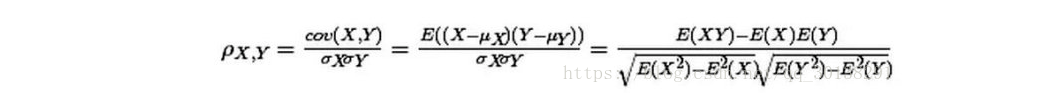

In [5]:
df_all.corr('pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


# 数据填充

In [6]:
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Fare

In [7]:
df_all[df_all['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


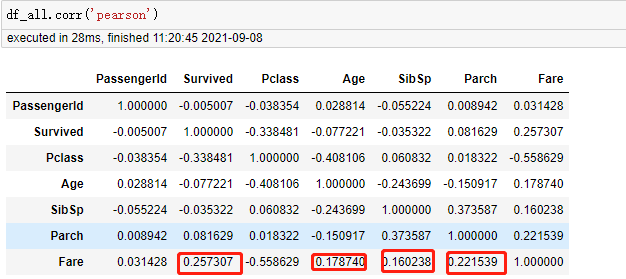

**Fare只缺失一个数据，而且是来自于test-验证数据，所以Survived为空，Age,SibSp,Parch三个属性和Fare相关性大于0.1，而且这行数据这三个值都不为空，但是这里的Age是连续值，不好分组，考虑到这里只有一条数据缺失,所以就舍弃Age,因为一般都会考虑到性别，所以最后也把Sex加上，所以这里用SibSp,Parch，Sex这三个属性-groupby分组之后的中位数填充**

In [8]:
df_all.groupby(['Parch', 'SibSp','Sex'])['Fare'].median()
# df_all.groupby(['Parch', 'Age', 'SibSp','Sex'])['Fare'].median().to_clipboard()

Parch  SibSp  Sex   
0      0      female     10.50000
              male        8.05000
       1      female     26.00000
              male       26.00000
       2      female     23.25000
              male       23.25000
       3      female     18.42500
              male       18.00000
1      0      female     39.40000
              male       33.00000
       1      female     26.00000
              male       23.00000
       2      female     23.00000
              male       25.25000
       3      female     25.46670
              male       21.55000
       4      male       34.40625
2      0      female     22.35830
              male       30.75000
       1      female     41.57920
              male       41.57920
       2      female    148.37500
              male      148.37500
       3      female    263.00000
              male       27.90000
       4      female     31.27500
              male       31.38750
       5      female     46.90000
              male       46

In [9]:
df_all['Fare'] = df_all['Fare'].fillna(8.05000)

In [10]:
df_all[df_all['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Age

**有263行数据缺失Age**<br />
**依照皮尔森相关性表来看的话，所有数字字段里面<span class="burk">只有Fare</span>和Age相关**<br />
**<span class="mark">后续优化</span>的时候可以考虑Age和Embarked,Cabin**

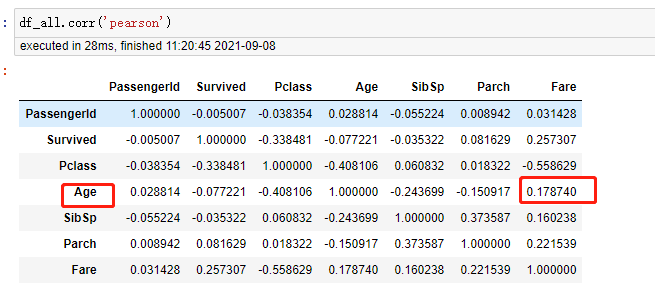

In [11]:
df_all['Age'].isnull().value_counts()

False    1046
True      263
Name: Age, dtype: int64

### 观察Age字段和Fare

#### 看一下Fare 的数据分布情况

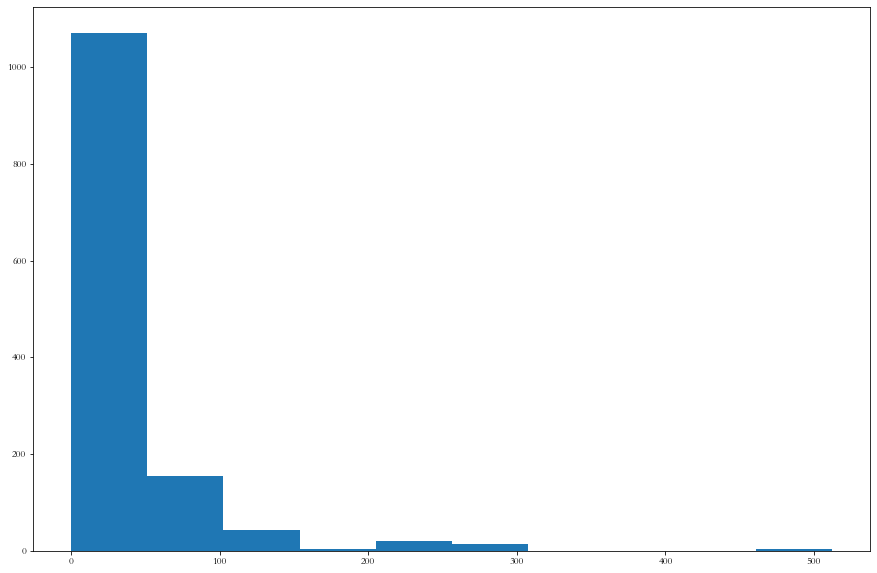

In [12]:
plt.figure(figsize=(15,10))
plt.hist(df_all['Fare'])
plt.show()

**大多数fare位于0-50区间**

<AxesSubplot:>

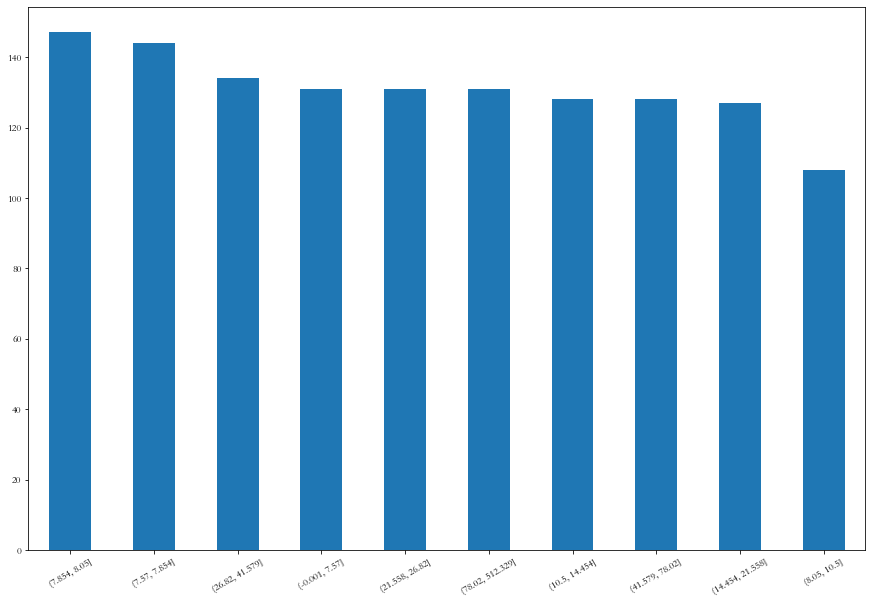

In [13]:
# 等量切分
df_all['Fare_cut'] = pd.qcut(df_all['Fare'],10)
plt.figure(figsize=(15,10))
df_all['Fare_cut'].value_counts().plot(kind='bar',rot=30)

**Fare等量切分成10个区间**

In [14]:
df_all.groupby(['Fare_cut','Sex']).agg({'Age':'median'})

Age
Fare_cut         Sex          
(-0.001, 7.57]   female  20.25
                 male    25.00
(7.57, 7.854]    female  22.00
                 male    25.00
(7.854, 8.05]    female  24.00
                 male    28.00
(8.05, 10.5]     female  22.50
                 male    24.50
(10.5, 14.454]   female  27.00
                 male    30.00
(14.454, 21.558] female  24.00
                 male    26.00
(21.558, 26.82]  female  29.00
                 male    36.00
(26.82, 41.579]  female  24.00
                 male    29.00
(41.579, 78.02]  female  35.00
                 male    32.00
(78.02, 512.329] female  35.00
                 male    37.00

#### groupby.transform 分组之后用组内的Age中位数填充

In [15]:
df_all['Age'] = df_all.groupby(['Fare_cut','Sex'])['Age'].transform(lambda x:x.fillna(x.median()))

In [16]:
df_all['Age'].isnull().value_counts()

False    1309
Name: Age, dtype: int64

#### groupby中apply和transform的区别

<div class="burk">
apply 和transform操作的都是分完组之后的，组内的整列整列的数据</div><i class="fa fa-lightbulb-o "></i>

In [17]:
list(df_all.groupby(['Fare_cut','Sex']))

[((Interval(-0.001, 7.57, closed='right'), 'female'),
        PassengerId  Survived  Pclass  \
  19             20       1.0       3   
  235           236       0.0       3   
  367           368       1.0       3   
  376           377       1.0       3   
  649           650       1.0       3   
  654           655       0.0       3   
  780           781       1.0       3   
  786           787       1.0       3   
  875           876       1.0       3   
  892           893       NaN       3   
  899           900       NaN       3   
  910           911       NaN       3   
  1004         1005       NaN       3   
  1182         1183       NaN       3   
  1238         1239       NaN       3   
  
                                                   Name     Sex    Age  SibSp  \
  19                            Masselmani, Mrs. Fatima  female  20.25      0   
  235                      Harknett, Miss. Alice Phoebe  female  20.25      0   
  367                    Moussa, Mrs. (Manto

groupby 里面的apply所操作的数据可以是<span class="burk">series</span> 或者<span class="burk">dataframe</span>

groupby 里面的transform所操作的数据<span class="burk">只能是series</span>

**下面的apply直接对分组**

In [18]:
df_all.groupby(['Fare_cut','Sex'])['Age','Fare'].apply(lambda x:x.count())

Age  Fare
Fare_cut         Sex              
(-0.001, 7.57]   female   15    15
                 male    116   116
(7.57, 7.854]    female   50    50
                 male     94    94
(7.854, 8.05]    female   22    22
                 male    125   125
(8.05, 10.5]     female   30    30
                 male     78    78
(10.5, 14.454]   female   49    49
                 male     79    79
(14.454, 21.558] female   61    61
                 male     66    66
(21.558, 26.82]  female   52    52
                 male     79    79
(26.82, 41.579]  female   52    52
                 male     82    82
(41.579, 78.02]  female   53    53
                 male     75    75
(78.02, 512.329] female   82    82
                 male     49    49

**下面的apply里面，传入的X是dataframe,如果是需要对单列进行操作，可以用<span class="burk">x.iloc</span>[:,0]这种方式**

In [19]:
df_all.groupby(['Fare_cut','Sex'])['Age','Fare'].apply(lambda x:x.iloc[:,0].count()+x.iloc[:,1].count())
# df_all.groupby(['Fare_cut','Sex'])['Age','Fare'].apply(lambda x:print(type(x)))

Fare_cut          Sex   
(-0.001, 7.57]    female     30
                  male      232
(7.57, 7.854]     female    100
                  male      188
(7.854, 8.05]     female     44
                  male      250
(8.05, 10.5]      female     60
                  male      156
(10.5, 14.454]    female     98
                  male      158
(14.454, 21.558]  female    122
                  male      132
(21.558, 26.82]   female    104
                  male      158
(26.82, 41.579]   female    104
                  male      164
(41.579, 78.02]   female    106
                  male      150
(78.02, 512.329]  female    164
                  male       98
dtype: int64

## Embarked

In [20]:
df_all[df_all['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_cut
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,"(78.02, 512.329]"
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,"(78.02, 512.329]"


In [21]:
df_all.groupby(['Fare_cut','Sex','Embarked'])['Embarked'].count()

Fare_cut          Sex     Embarked
(-0.001, 7.57]    female  C             7
                          Q             3
                          S             5
                  male    C            42
                          Q             4
                          S            70
(7.57, 7.854]     female  C             0
                          Q            34
                          S            16
                  male    C             0
                          Q            38
                          S            56
(7.854, 8.05]     female  C             0
                          Q             8
                          S            14
                  male    C             6
                          Q             2
                          S           117
(8.05, 10.5]      female  C             1
                          Q             1
                          S            28
                  male    C             3
                          Q             2

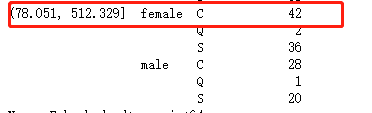

**缺失的这两行，都为女性，费用是80**
这里用对应的：
票价在(78.051, 512.329]区间
女性里，数量最多的<span class="burk">C港口</span>填充


In [22]:
# Filling the missing values in Embarked with S
df_all['Embarked'] = df_all['Embarked'].fillna('C')

In [23]:
df_all[df_all['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_cut


## Cabin

In [24]:
df_all['Cabin'].isnull().value_counts()

True     1014
False     295
Name: Cabin, dtype: int64

**Cabin属性有很多缺失值,这里暂时用M填充缺失值，其他的用首字母代替**

In [25]:
df_all['Cabin'] = df_all['Cabin'].fillna('M')
# 缺失值用M代替
df_all['Cabin_new'] = df_all['Cabin'].apply(lambda x:x[0])

In [26]:
df_all['Cabin_new'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin_new, dtype: int64

**缺失值补充结束**

In [27]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   object  
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   float64 
 10  Cabin        1309 non-null   object  
 11  Embarked     1309 non-null   object  
 12  Fare_cut     1309 non-null   category
 13  Cabin_new    1309 non-null   object  
dtypes: category(1), float64(3), int64(4), object(6)
memory usage: 135.1+ KB


In [28]:
df_all_copy = df_all.copy()
# 数据备份

# 获救分析

In [29]:
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_cut,Cabin_new
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,"(-0.001, 7.57]",M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(41.579, 78.02]",C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,"(7.854, 8.05]",M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(41.579, 78.02]",C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,"(7.854, 8.05]",M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,M,S,"(7.854, 8.05]",M
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,"(78.02, 512.329]",C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,"(-0.001, 7.57]",M
1307,1308,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,M,S,"(7.854, 8.05]",M


In [30]:
survived_sum = df_train['Survived'].value_counts().sum()
df_train['Survived'].value_counts()/ survived_sum

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<AxesSubplot:>

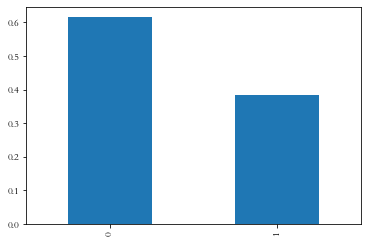

In [31]:
(df_train['Survived'].value_counts()/ survived_sum).plot(kind='bar')

**训练集中获救几率约为38%**

# Feature Engineering

## Fare

In [32]:
del df_all['Fare_cut']
df_all[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_new
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C


**前面为Age属性填充缺失值的时候，将Fare字段分10个区间，新建了一个属性Fare_cut，这里将其删除**

## Cabin

In [33]:
df_all['Cabin'] = df_all['Cabin_new']
del df_all['Cabin_new']

In [34]:
df_all[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C


**用之前新构建的属性Cabin_new的值代替Cabin**

## Age

**暂无**

## 新的feature----Family_Size

In [35]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

**用SibSp，Parch加1，得到Family_Size的值**

In [36]:
df_all[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2


##  新的feature----Title

In [37]:
df_all['Name'].str.split(', ', expand=True)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
1304,Spector,Mr. Woolf
1305,Oliva y Ocana,Dona. Fermina
1306,Saether,Mr. Simon Sivertsen
1307,Ware,Mr. Frederick


**提取Name字段中的前缀**

In [38]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_all['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
Lady              1
Capt              1
Jonkheer          1
Mme               1
Dona              1
Sir               1
the Countess      1
Don               1
Name: Title, dtype: int64

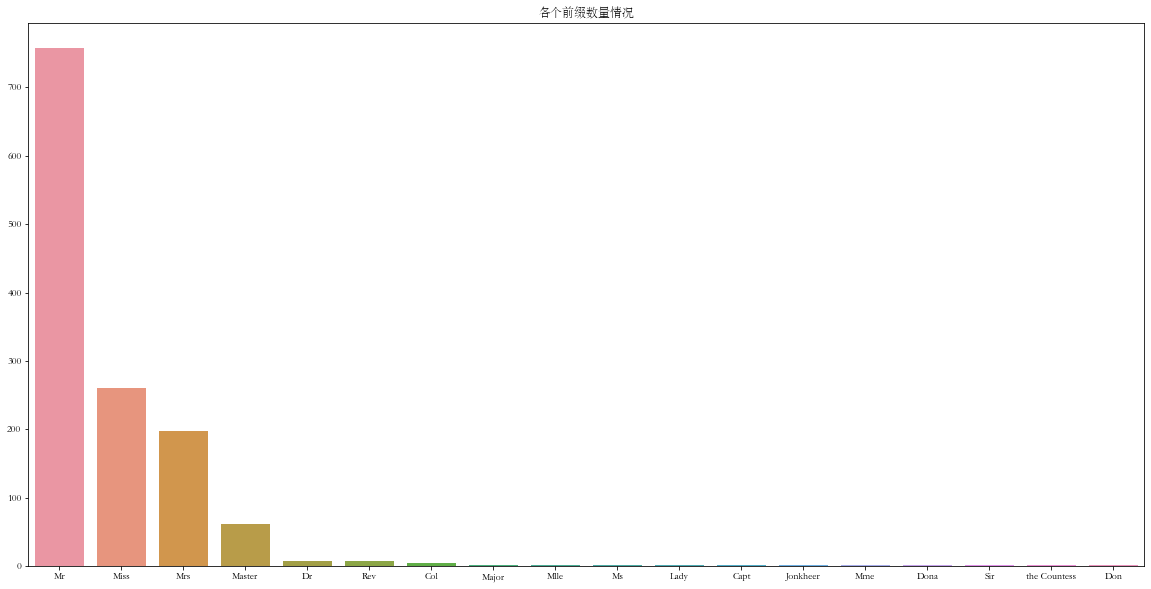

In [39]:
plt.subplots(figsize=(20, 10))
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values)
plt.title('各个前缀数量情况')
plt.show()

**这里我把常见的Mr，Miss，Mrs，Ms归为一类，其他的统一归为一类**

In [40]:
df_all['Title'].replace(['Mr','Miss','Mrs','Ms'],'cate1',inplace=True)
df_all['Title'] = df_all['Title'].apply(lambda x:'cate1' if x=='cate1' else 'cate2')

In [41]:
df_all['Title'].value_counts()

cate1    1216
cate2      93
Name: Title, dtype: int64

**cate1 代表Mr，Miss，Mrs，Ms这些前缀,cate2 代表其他**

In [42]:
df_all[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,2,cate1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,cate1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,1,cate1


## 删除feature----PassengerId,Name,Ticket	

In [43]:
df_all.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
df_all[:3]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size,Title
0,0.0,3,male,22.0,1,0,7.2500,M,S,2,cate1
1,1.0,1,female,38.0,1,0,71.2833,C,C,2,cate1
2,1.0,3,female,26.0,0,0,7.9250,M,S,1,cate1


## 分类型feature 编码

**<span class="burk">名义变量，有距变量适合用独热编码OneHotEncoder<br />
有距变量,适合用LabelEncoder</span>**

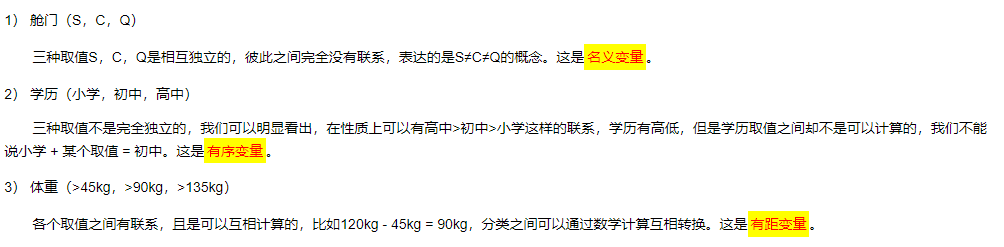

In [2]:
df_all

**Sex,Cabin,Embarked,Title<br />
这里需要编码的四个feature都应该用onehot编码**

### OneHotEncoder

In [45]:
cat_features_list = ['Sex', 'Cabin', 'Embarked', 'Title']
df_all_encode = pd.DataFrame()
for feature in cat_features_list:
    data_encode = OneHotEncoder().fit_transform(df_all[feature].values.reshape(-1, 1)).toarray()
    value_count = df_all[feature].unique().size
    new_columns = ['{}_{}'.format(feature,i) for i in range(1,value_count+1)]
    print(new_columns)
    df_encode = pd.DataFrame(data_encode,columns=new_columns)
#     print(df_encode)
    df_all_encode = pd.concat([df_all_encode,df_encode],axis=1)


['Sex_1', 'Sex_2']
['Cabin_1', 'Cabin_2', 'Cabin_3', 'Cabin_4', 'Cabin_5', 'Cabin_6', 'Cabin_7', 'Cabin_8', 'Cabin_9']
['Embarked_1', 'Embarked_2', 'Embarked_3']
['Title_1', 'Title_2']


**OneHotEncoder编码之后的数据如下**

In [46]:
df_all_encode

,Sex_1,Sex_2,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Cabin_7,Cabin_8,Cabin_9,Embarked_1,Embarked_2,Embarked_3,Title_1,Title_2
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1305,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1306,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1307,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


**将OneHotEncoder编码生成的数据和df_all拼接起来，并且将编码之前的四个feature:['Sex', 'Cabin', 'Embarked', 'Title']删除**

In [47]:
df_all = pd.concat([df_all,df_all_encode],axis=1)
df_all.drop(columns=['Sex','Cabin','Embarked','Title'],inplace=True)

In [48]:
df_all[:3]

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_1,Sex_2,Cabin_1,...,Cabin_5,Cabin_6,Cabin_7,Cabin_8,Cabin_9,Embarked_1,Embarked_2,Embarked_3,Title_1,Title_2
0,0.0,3,22.0,1,0,7.2500,2,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,1,38.0,1,0,71.2833,2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,3,26.0,0,0,7.9250,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [49]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    float64
 1   Pclass       1309 non-null   int64  
 2   Age          1309 non-null   float64
 3   SibSp        1309 non-null   int64  
 4   Parch        1309 non-null   int64  
 5   Fare         1309 non-null   float64
 6   Family_Size  1309 non-null   int64  
 7   Sex_1        1309 non-null   float64
 8   Sex_2        1309 non-null   float64
 9   Cabin_1      1309 non-null   float64
 10  Cabin_2      1309 non-null   float64
 11  Cabin_3      1309 non-null   float64
 12  Cabin_4      1309 non-null   float64
 13  Cabin_5      1309 non-null   float64
 14  Cabin_6      1309 non-null   float64
 15  Cabin_7      1309 non-null   float64
 16  Cabin_8      1309 non-null   float64
 17  Cabin_9      1309 non-null   float64
 18  Embarked_1   1309 non-null   float64
 19  Embark

## 数据切分

In [50]:
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]

del df_test['Survived']
y_train = df_train['Survived'].values
del df_train['Survived']

In [51]:
df_train.shape

(891, 22)

In [52]:
df_test.shape

(418, 22)

In [53]:
y_train.shape

(891,)

## 标准化

In [54]:
x_train = StandardScaler().fit_transform(df_train)
x_test = StandardScaler().fit_transform(df_test)

print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('x_test shape: {}'.format(x_test.shape))

x_train shape: (891, 22)
y_train shape: (891,)
x_test shape: (418, 22)


# model

## 决策树

In [55]:
df_result = pd.DataFrame()

In [56]:
from sklearn import tree 
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model.fit(x_train,y_train)
y_predict_with_dtree = decision_tree_model.predict(x_test)

df_result['y_predict_with_dtree'] = y_predict_with_dtree
df_result

,y_predict_with_dtree
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
413,0.0
414,1.0
415,0.0
416,0.0


## 逻辑回归

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr = LogisticRegression().fit(x_train,y_train)
y_predict_with_logisticReg = lr.predict(x_test)

df_result['y_predict_with_logisticReg'] = y_predict_with_logisticReg
df_result

,y_predict_with_dtree,y_predict_with_logisticReg
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,1.0
...,...,...
413,0.0,0.0
414,1.0,1.0
415,0.0,0.0
416,0.0,0.0


## 支持向量机

In [62]:
from sklearn import svm

In [64]:
svm_model = svm.SVC()
svm_model.fit(x_train,y_train)
y_predict_with_svm = svm_model.predict(x_test)

df_result['y_predict_with_svm'] = y_predict_with_svm
df_result

,y_predict_with_dtree,y_predict_with_logisticReg,y_predict_with_svm
0,0.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,1.0,0.0
...,...,...,...
413,0.0,0.0,0.0
414,1.0,1.0,1.0
415,0.0,0.0,0.0
416,0.0,0.0,0.0


## KNN

In [79]:
from sklearn import neighbors

In [85]:
knnmodel = neighbors.KNeighborsClassifier(n_neighbors=2) #n_neighbors参数为分类个数
knnmodel.fit(x_train,y_train)

y_predict_with_knn = knnmodel.predict(x_test)
df_result['y_predict_with_knn'] = y_predict_with_knn
df_result

,y_predict_with_dtree,y_predict_with_logisticReg,y_predict_with_svm,y_predict_with_knn
0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0
...,...,...,...,...
413,0.0,0.0,0.0,0.0
414,1.0,1.0,1.0,1.0
415,0.0,0.0,0.0,0.0
416,0.0,0.0,0.0,0.0


## 随机森林

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
model_randomforest = RandomForestClassifier().fit(x_train,y_train)
y_predict_with_random_forest = model_randomforest.predict(x_test)
df_result['y_predict_with_random_forest'] = y_predict_with_random_forest
df_result

,y_predict_with_dtree,y_predict_with_logisticReg,y_predict_with_svm,y_predict_with_knn,y_predict_with_random_forest
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
413,0.0,0.0,0.0,0.0,0.0
414,1.0,1.0,1.0,1.0,1.0
415,0.0,0.0,0.0,0.0,0.0
416,0.0,0.0,0.0,0.0,0.0


# 结果验证

这里为了本地快速得到我的预测数据的正确率，我从kaggle其他大神提交记录下获得了正确率为100%的预测结果作为验证数据；<br />
所以上面五个模型的正确率如下，<span class="burk">随机森林</span>得分最高：0.7871。

In [97]:
df_check = pd.read_csv(r'../titanic_dir/titanic_data/正确_submission_titanic.csv')
df_check = df_check['Survived']
# df_check
for column in df_result:
    df_concat = pd.concat([df_result[column],df_check],axis=1)
    df_concat['predict_tag'] = df_concat.apply(lambda x: 1 if x[0]==x[1] else 0,axis=1)
    right_rate = df_concat['predict_tag'].sum()/df_concat['predict_tag'].count()
    print(column,'正确率为：')
    print(np.round(right_rate,4))

y_predict_with_dtree 正确率为：
0.7057
y_predict_with_logisticReg 正确率为：
0.7703
y_predict_with_svm 正确率为：
0.7656
y_predict_with_knn 正确率为：
0.7656
y_predict_with_random_forest 正确率为：
0.7871
